## Multi variate chain  rule
Given the function 

\begin{equation}
f(x,y,z) = sin(x) e^{yz^2}
\end{equation}

where 

\begin{equation}
x = t-1; y = t^2; z = 1/t;
\end{equation}

\begin{equation}
\frac{\partial f}{\partial t} = \frac{\partial f}{\partial x}\frac{\partial x}{\partial t} + \frac{\partial f}{\partial y}\frac{\partial y}{\partial t} + \frac{\partial f}{\partial z}\frac{\partial z}{\partial t}
\end{equation}
 ___
 
If we want to calculate the derivative of $f$ with respect to $t$, we can use this expression which is simply 
>The sum of the chains relating $f$ to $t$ through each of its three variables. 
This allows us to calculate the result in a <ins>**__Piecewise__**</ins> manner rather than substituting everything in at the start

For the function $f(x(\boldsymbol{u}(t)))$, we can calculate the derivative of $f$ i.e. $\frac {df}{dt}$ using the formula
$$
\begin{equation*}
\frac{df}{dt} = \frac {\partial f}{\partial x} \frac{\partial x}{\partial \boldsymbol{u}}\frac{\boldsymbol{u}}{dt} = 
\begin{bmatrix}
\frac{\partial f}{\partial x_1}, &
\frac{\partial f}{\partial x_2}
\end{bmatrix}
\begin{bmatrix}
\frac{\partial x_1}{\partial u_1} &
\frac{\partial x_1}{\partial u_2} \\\\
\frac{\partial x_2}{\partial u_1} &
\frac{\partial x_2}{\partial u_2} \\\\
\end{bmatrix}
\begin{bmatrix}
\frac{du_1}{dt} \\\\
\frac{du_2}{dt}
\end{bmatrix}
\end{equation*}
$$

In [1]:
from pdf2image import convert_from_path
from sympy import *
import numpy as np
import pandas as pd
from IPython.display import Image, display

filename = 'f.tex'

In [2]:
def convertToEquation(matrix, name):
    # convert the numpy array of 2nd partial derivatives to a latex string
    tex = '\\begin{equation*}'
    tex += name
    tex += ' ='
    tex += convertMatrixToLatex(matrix)
    tex += '\\end{equation*}'
    return tex


def encapsulateExpression(arg, name=''):
    if name == '':
        tex = '\\begin{equation*}'
    else:
        tex = '\\begin{equation*}'
        tex += name
        tex += ' ='
    for item in arg:
        tex += item
        tex += ''
    tex += '\\end{equation*}'
    return tex


def convertMatrixToLatex(matrix):
    tex = '\\begin{bmatrix}'
    df = pd.DataFrame(matrix)
    tex += ' \\\\ \\\\'.join(
        df.apply(lambda row: ' &'.join([latex(expr) for expr in row]), axis=1))
    tex += '\\end{bmatrix}'
    del df
    return tex


def convertFunctionToLatex(f):
    # print solution in latex format
    print("\\begin{equation*}f(x, y, z) = " + latex(f) + "\\end{equation*}")


    # print(J_ltx)
def substitute(equation, pnt):
    ePnt = []
    for i in range(equation.shape[0]):
        row = []
        for j in range(equation.shape[1]):
            row.append(equation[i, j].subs(pnt))
        ePnt.append(row)

    return ePnt


def writeLatex(tex,
               filename,
               title="",
               font_size='40pt',
               width="12cm",
               height="5cm"):
    
    rawTex = "\\documentclass["
    rawTex += font_size
    rawTex += "]{article}\n"
    rawTex += "\\usepackage{mathtools}\n"
    rawTex += "\\usepackage{graphicx}\n"
    rawTex += "\\usepackage[%\n"
    rawTex += "papersize={"
    rawTex += width
    rawTex += ","
    rawTex += height
    rawTex += "},\n"
    rawTex += "hmargin=0cm,%\n"
    rawTex += "vmargin=.5cm,%\n"
    rawTex += "head=0cm,% might be changed later\n"
    rawTex += "headsep=0pt,%\n"
    rawTex += "foot=0cm% might be changed later\n"
    rawTex += "]{geometry}% http://ctan.org/pkg/geometry\n"
    rawTex += "\\begin{document}\n"
    rawTex += "\\pagestyle{empty}"
    if title!= "":
        rawTex += "\\textbf{\Large "
        rawTex += title
        rawTex += "}\n"
    rawTex += tex
    rawTex += "\\end{document}"
    with open(filename, 'w') as fp:
        fp.write(rawTex)


# Multivariate chain rule exercise 
In this quiz, you will practice calculating the multivariate chain rule for various functions.

## Question 1
For the following functions, calculate the expression
$\frac{\partial f}{\partial t} = \frac{\partial f}{\partial \boldsymbol{x}}\frac{\partial \boldsymbol{x}}{\partial t}$ in matrix form, where $\boldsymbol{x}=(x_1, x_2)$

\begin{equation*}

f(\boldsymbol{x})=f(x_1,x_2)=x_1^{2} x_2^{2}+x_1x_2 
\end{equation*}

\begin{equation*}
x_1(t) = 1-t^2
\end{equation*}

\begin{equation*}
x_2(t) = 1+t^2
\end{equation*}

We use the formula above to answer the question.

\begin{equation}
\frac{df}{dt} = \frac {\partial f}{\partial \boldsymbol{x}} \frac{\partial \boldsymbol{x}}{dt} = 
\begin{bmatrix}
\frac{\partial f}{\partial x_1}, &
\frac{\partial f}{\partial x_2}
\end{bmatrix}

\begin{bmatrix}
\frac{dx_1}{dt} \\\\
\frac{dx_2}{dt}
\end{bmatrix}
\end{equation}
​




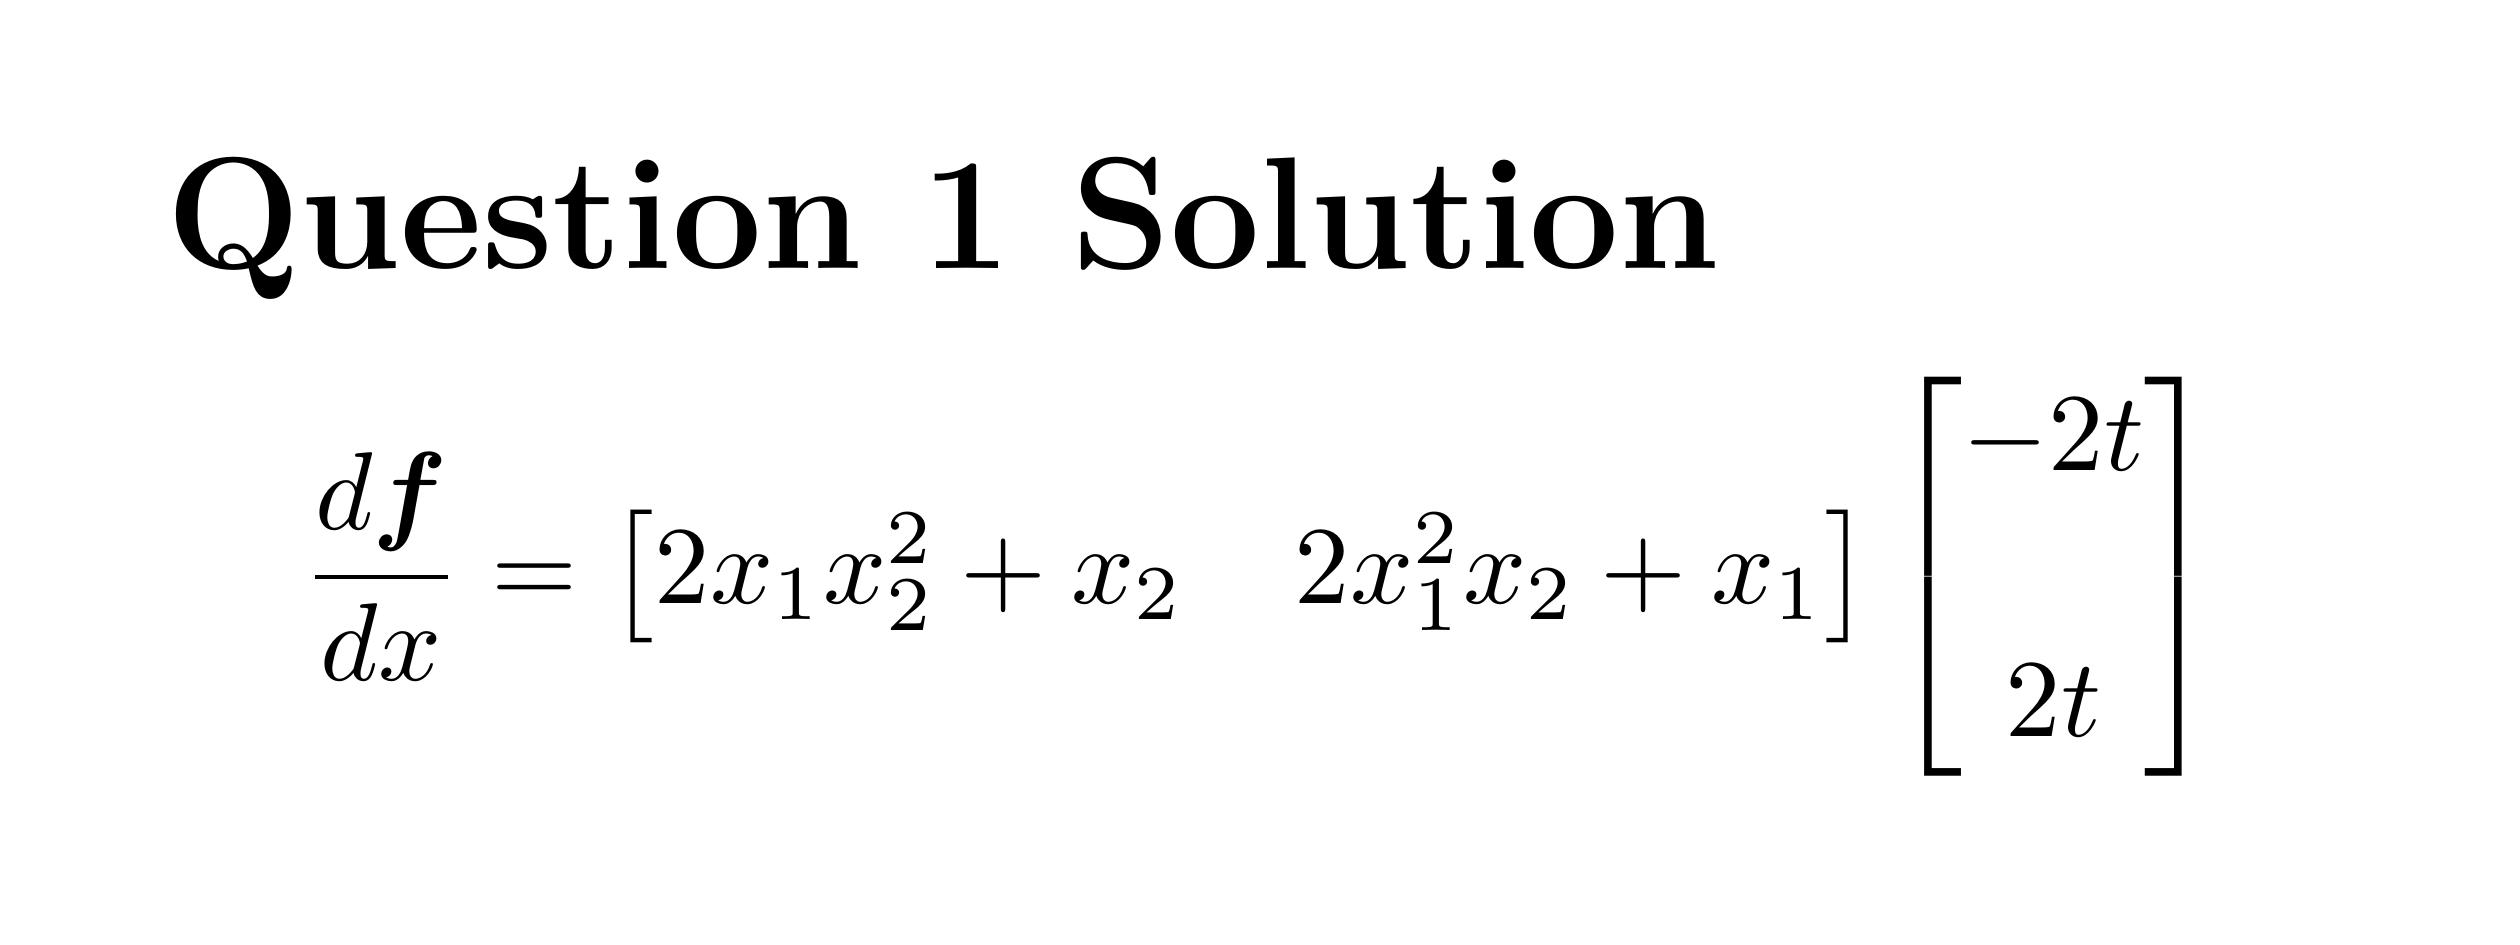

In [3]:
x1s = Symbol('x1')
x2s = Symbol('x2')
t = Symbol('t')
f = x1s**2*x2s**2 + x1s*x2s
x1 = 1 - t**2
x2 = 1 + t**2
fPrimeX = np.array([[diff(f,x1s), diff(f,x2s)]])
xPrimeT =np.array([[diff(x1, t), diff(x2,t)]]).T
ltxList = [convertMatrixToLatex (fPrimeX),
            convertMatrixToLatex (xPrimeT)]


tex = encapsulateExpression(ltxList, name='\\frac{d\\boldsymbol{f}}{dx}')
writeLatex(tex, filename,
           title="Question 1 Solution",
           width="8cm",
           height="3cm")
!lualatex  "$filename" 2>>/dev/null >>/dev/null
pdf = filename.split('.')[0]+".pdf"
jpg = filename.split('.')[0]+".jpg"
pages = convert_from_path(pdf, dpi=800)
pages[0].save(jpg, "JPEG")
!rm -f "$filename" 2>>/dev/null
!rm -f "$pdf" 2>>/dev/null
im = Image(jpg,width=1000)
!rm -f "$jpg" 2>>/dev/null
display(im)



## Question 2
For the following functions, calculate the expression
$\frac{\partial f}{\partial t} = \frac{\partial f}{\partial \boldsymbol{x}}\frac{\partial \boldsymbol{x}}{\partial t}$ in matrix form, where $\boldsymbol{x}=(x_1, x_2, x_3)$

\begin{equation*}

f(\boldsymbol{x})=f(x_1,x_2,x_3)=x_1^{3} cos(x_2) e^{x_3}
\end{equation*}

\begin{equation*}
x_1(t) = 2t
\end{equation*}

\begin{equation*}
x_2(t) = 1-t^2
\end{equation*}

\begin{equation*}
x_3(t) = e^2
\end{equation*}

We use the formula below to answer the question.

\begin{equation}
\frac{df}{dt} = \frac {\partial f}{\partial \boldsymbol{x}} \frac{\partial \boldsymbol{x}}{dt} = 
\begin{bmatrix}
\frac{\partial f}{\partial x_1}, &
\frac{\partial f}{\partial x_2}
\end{bmatrix}

\begin{bmatrix}
\frac{dx_1}{dt} \\\\
\frac{dx_2}{dt}
\end{bmatrix}
\end{equation}
​






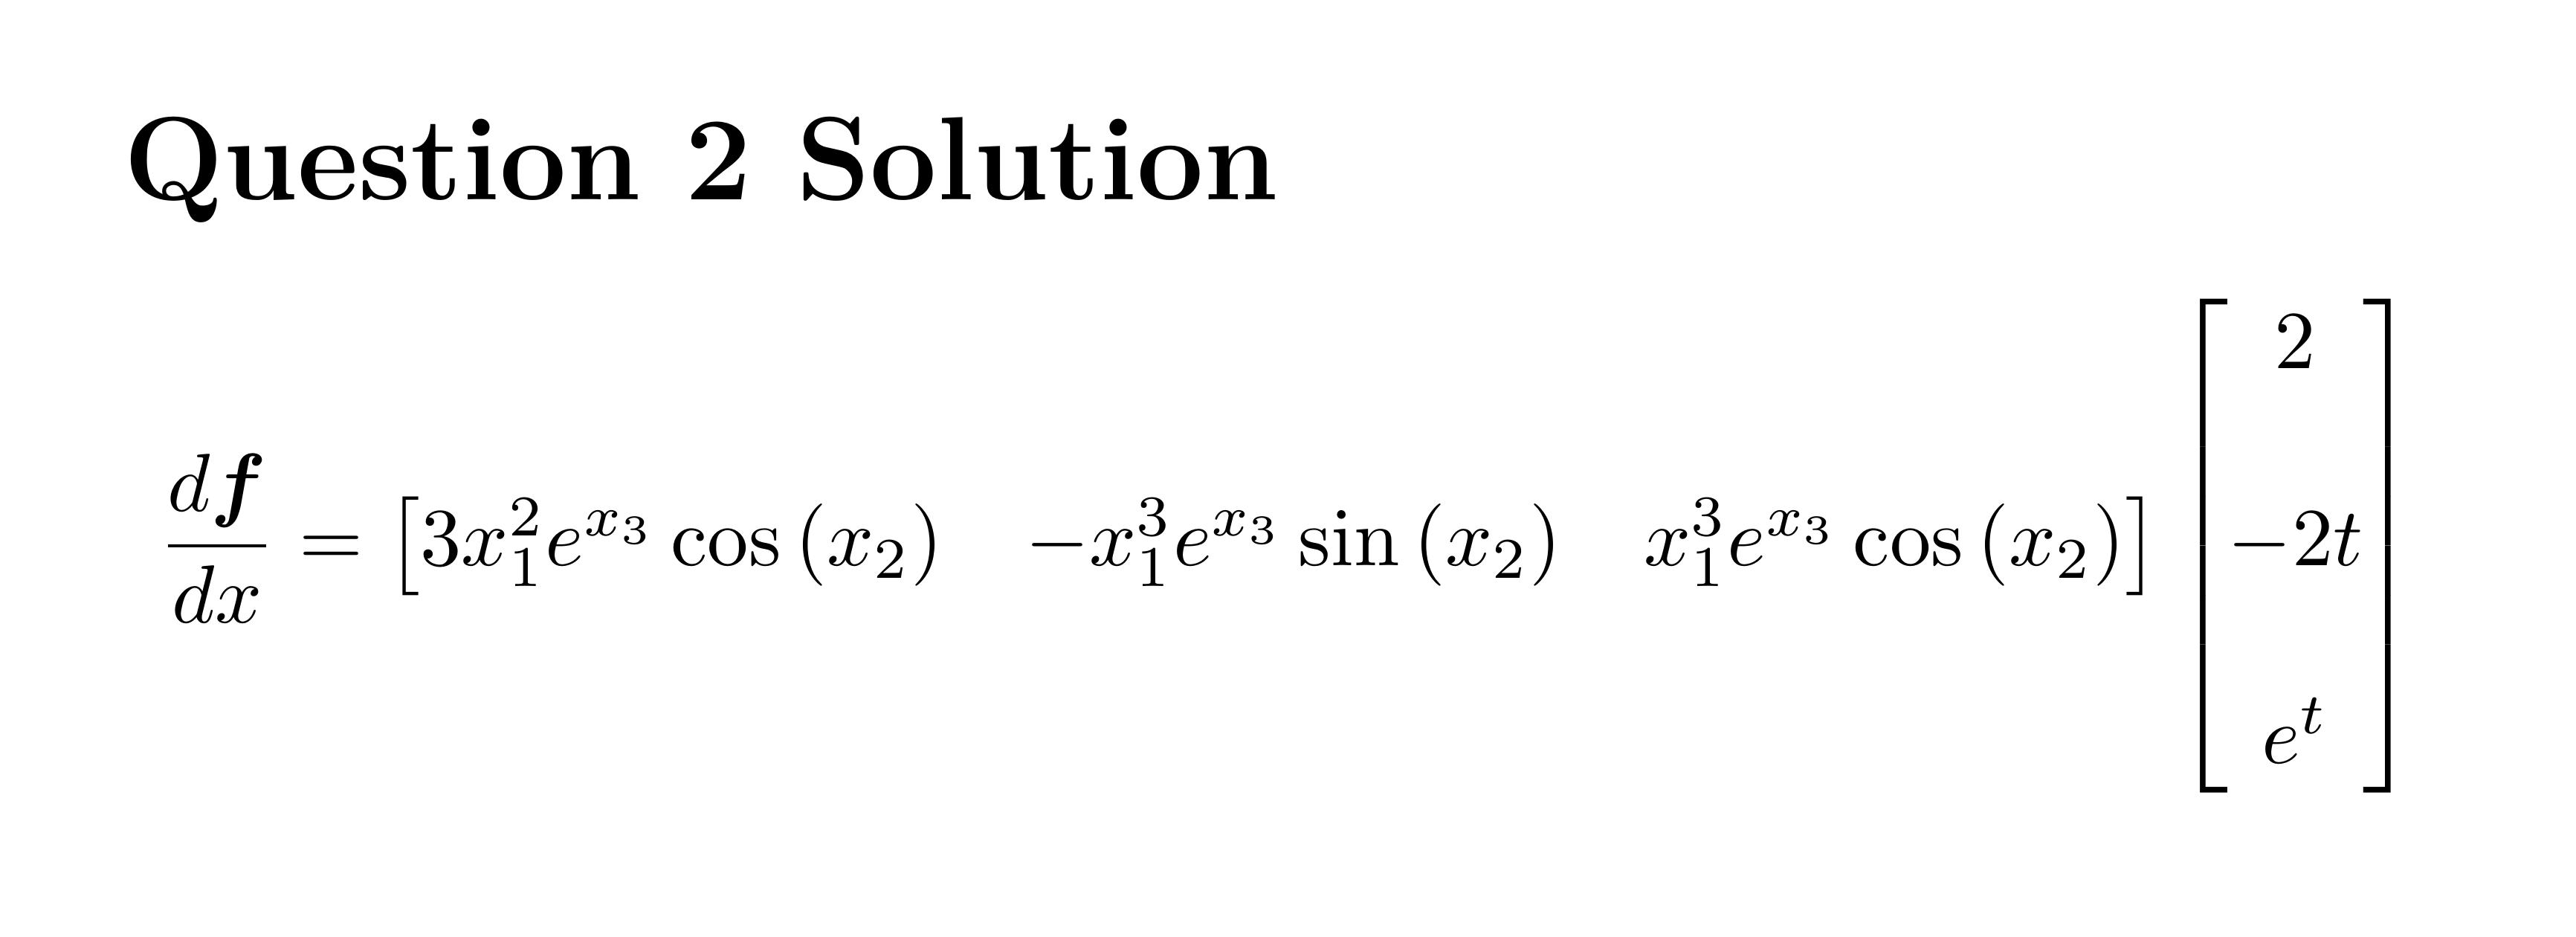

In [4]:
x1s = Symbol('x1')
x2s = Symbol('x2')
x3s = Symbol('x3')
t = Symbol('t')
f = x1s**3*cos(x2s)*exp(x3s)
x1 = 2*t
x2 = 1 - t**2
x3 = exp(t)
fPrimeX = np.array([[diff(f,x1s), diff(f,x2s),diff(f,x3s)]])
xPrimeT =np.array([[diff(x1, t), diff(x2,t),diff(x3,t)]]).T
ltxList = [convertMatrixToLatex (fPrimeX),
            convertMatrixToLatex (xPrimeT)]
tex = encapsulateExpression(ltxList, name='\\frac{d\\boldsymbol{f}}{dx}')
writeLatex(tex, filename,
           title="Question 2 Solution",
           width="11cm",
           height="4cm")
!lualatex  "$filename" 2>>/dev/null >>/dev/null
pdf = filename.split('.')[0]+".pdf"
jpg = filename.split('.')[0]+".jpg"
pages = convert_from_path(pdf, dpi=800)
pages[0].save(jpg, "JPEG")
!rm -f "$filename" 2>>/dev/null
!rm -f "$pdf" 2>>/dev/null
im = Image(jpg,width=1000)
!rm -f "$jpg" 2>>/dev/null
display(im)

## Question 3
For the following functions, calculate the expression
$\frac{\partial f}{\partial t} = \frac{\partial f}{\partial \boldsymbol{x}}\frac{\partial \boldsymbol{x}}{\partial \boldsymbol{u}} \frac{d\boldsymbol{u}}{dt}$ in matrix form, where $\boldsymbol{x}=(x_1,x_2)$ and $\boldsymbol{u}=(u_1, u_2)$

\begin{equation*}
f(\boldsymbol{x})=f(x_1,x_2)=x_1^{2}-x_2^{2}
\end{equation*}

\begin{equation*}
x1(u_1, u_2)= 2u_1 + 3u_2
\end{equation*}

\begin{equation*}
x2(u_1, u_2)= 2u_1 - 3u_2
\end{equation*}

\begin{equation*}
u_1(t) = cos(t/2)
\end{equation*}

\begin{equation*}
u_2(t) = sin(2t)
\end{equation*}

For the function $f(x(\boldsymbol{u}(t)))$, we can calculate the derivative of $f$ i.e. $\frac {df}{dt}$ using the formula

\begin{equation*}
\frac{df}{dt} = \frac {\partial f}{\partial \boldsymbol{x}} \frac{\partial \boldsymbol{x}}{\partial \boldsymbol{u}}\frac{\boldsymbol{u}}{dt} = 
\begin{bmatrix}
\frac{\partial f}{\partial x_1}, &
\frac{\partial f}{\partial x_2}
\end{bmatrix}
\begin{bmatrix}
\frac{\partial x_1}{\partial u_1} &
\frac{\partial x_1}{\partial u_2} \\\\
\frac{\partial x_2}{\partial u_1} &
\frac{\partial x_2}{\partial u_2} \\\\
\end{bmatrix}
\begin{bmatrix}
\frac{du_1}{dt} \\\\
\frac{du_2}{dt}
\end{bmatrix}
\end{equation*}


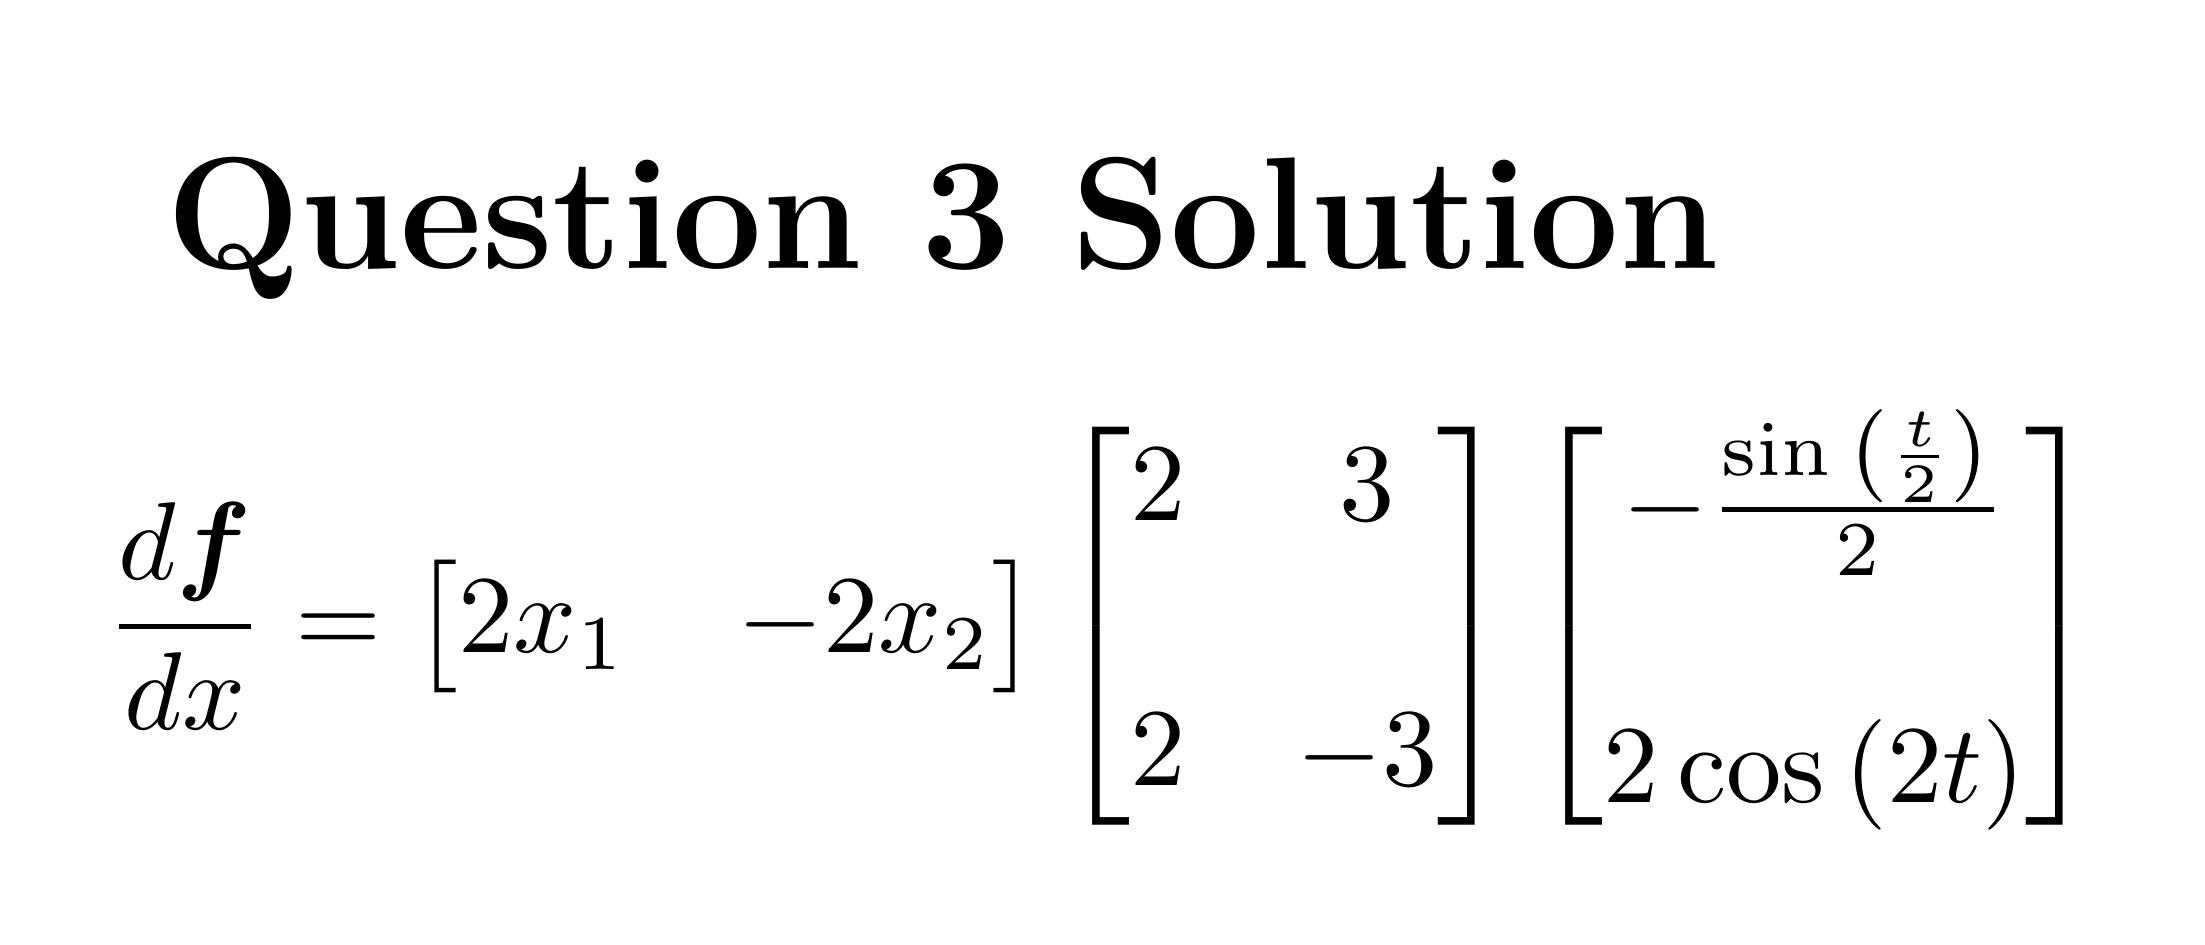

In [5]:
t = Symbol('t')
x1s= Symbol('x1')
x2s= Symbol('x2')
u1s= Symbol('u1')
u2s= Symbol('u2')
u1 = cos(t/2)
u2 = sin(2*t)
x1 = 2*u1s + 3*u2s
x2 = 2*u1s- 3*u2s
f = x1s**2-x2s**2

fPrimeX = np.array([[diff(f,x1s), diff(f,x2s)]])
fPrimeU = np.array([[diff(x1,u1s), diff(x1,u2s)],
                    [diff(x2,u1s), diff(x2,u2s)]])
xPrimeT =np.array([[diff(u1, t), diff(u2,t)]]).T
ltxList = [convertMatrixToLatex (fPrimeX),
           convertMatrixToLatex (fPrimeU), 
            convertMatrixToLatex (xPrimeT)]
tex = encapsulateExpression(ltxList, name='\\frac{d\\boldsymbol{f}}{dx}')
writeLatex(tex, filename,
           title="Question 3 Solution",
           width="7cm",
           height="3cm")
!lualatex  "$filename" 2>>/dev/null >>/dev/null
pdf = filename.split('.')[0]+".pdf"
jpg = filename.split('.')[0]+".jpg"
pages = convert_from_path(pdf, dpi=800)
pages[0].save(jpg, "JPEG")
!rm -f "$filename" 2>>/dev/null
!rm -f "$pdf" 2>>/dev/null
im = Image(jpg,width=1000)
!rm -f "$filename" 2>>/dev/null
display(im)

## Question 4
For the following functions, calculate the expression
$\frac{\partial f}{\partial t} = \frac{\partial f}{\partial \boldsymbol{x}}\frac{\partial \boldsymbol{x}}{\partial \boldsymbol{u}} \frac{d\boldsymbol{u}}{dt}$ in matrix form, where $\boldsymbol{x}=(x_1,x_2)$ and $\boldsymbol{u}=(u_1, u_2)$

\begin{equation*}
f(\boldsymbol{x})=f(x_1,x_2)=cos(x_1) sin(x_2)
\end{equation*}

\begin{equation*}
x1(u_1, u_2)= 2u_1^{2} + 3u_2^{2} -u_2
\end{equation*}

\begin{equation*}
x2(u_1, u_2)= 2u_1 - 5u_2^{3}
\end{equation*}

\begin{equation*}
u_1(t) = e^{t/2}
\end{equation*}

\begin{equation*}
u_2(t) = e^{-2t}
\end{equation*}

For the function $f(x(\boldsymbol{u}(t)))$, we can calculate the derivative of $f$ i.e. $\frac {df}{dt}$ using the formula

\begin{equation*}
\frac{df}{dt} = \frac {\partial f}{\partial \boldsymbol{x}} \frac{\partial \boldsymbol{x}}{\partial \boldsymbol{u}}\frac{\boldsymbol{u}}{dt} = 
\begin{bmatrix}
\frac{\partial f}{\partial x_1}, &
\frac{\partial f}{\partial x_2}
\end{bmatrix}
\begin{bmatrix}
\frac{\partial x_1}{\partial u_1} &
\frac{\partial x_1}{\partial u_2} \\\\
\frac{\partial x_2}{\partial u_1} &
\frac{\partial x_2}{\partial u_2} \\\\
\end{bmatrix}
\begin{bmatrix}
\frac{du_1}{dt} \\\\
\frac{du_2}{dt}
\end{bmatrix}
\end{equation*}


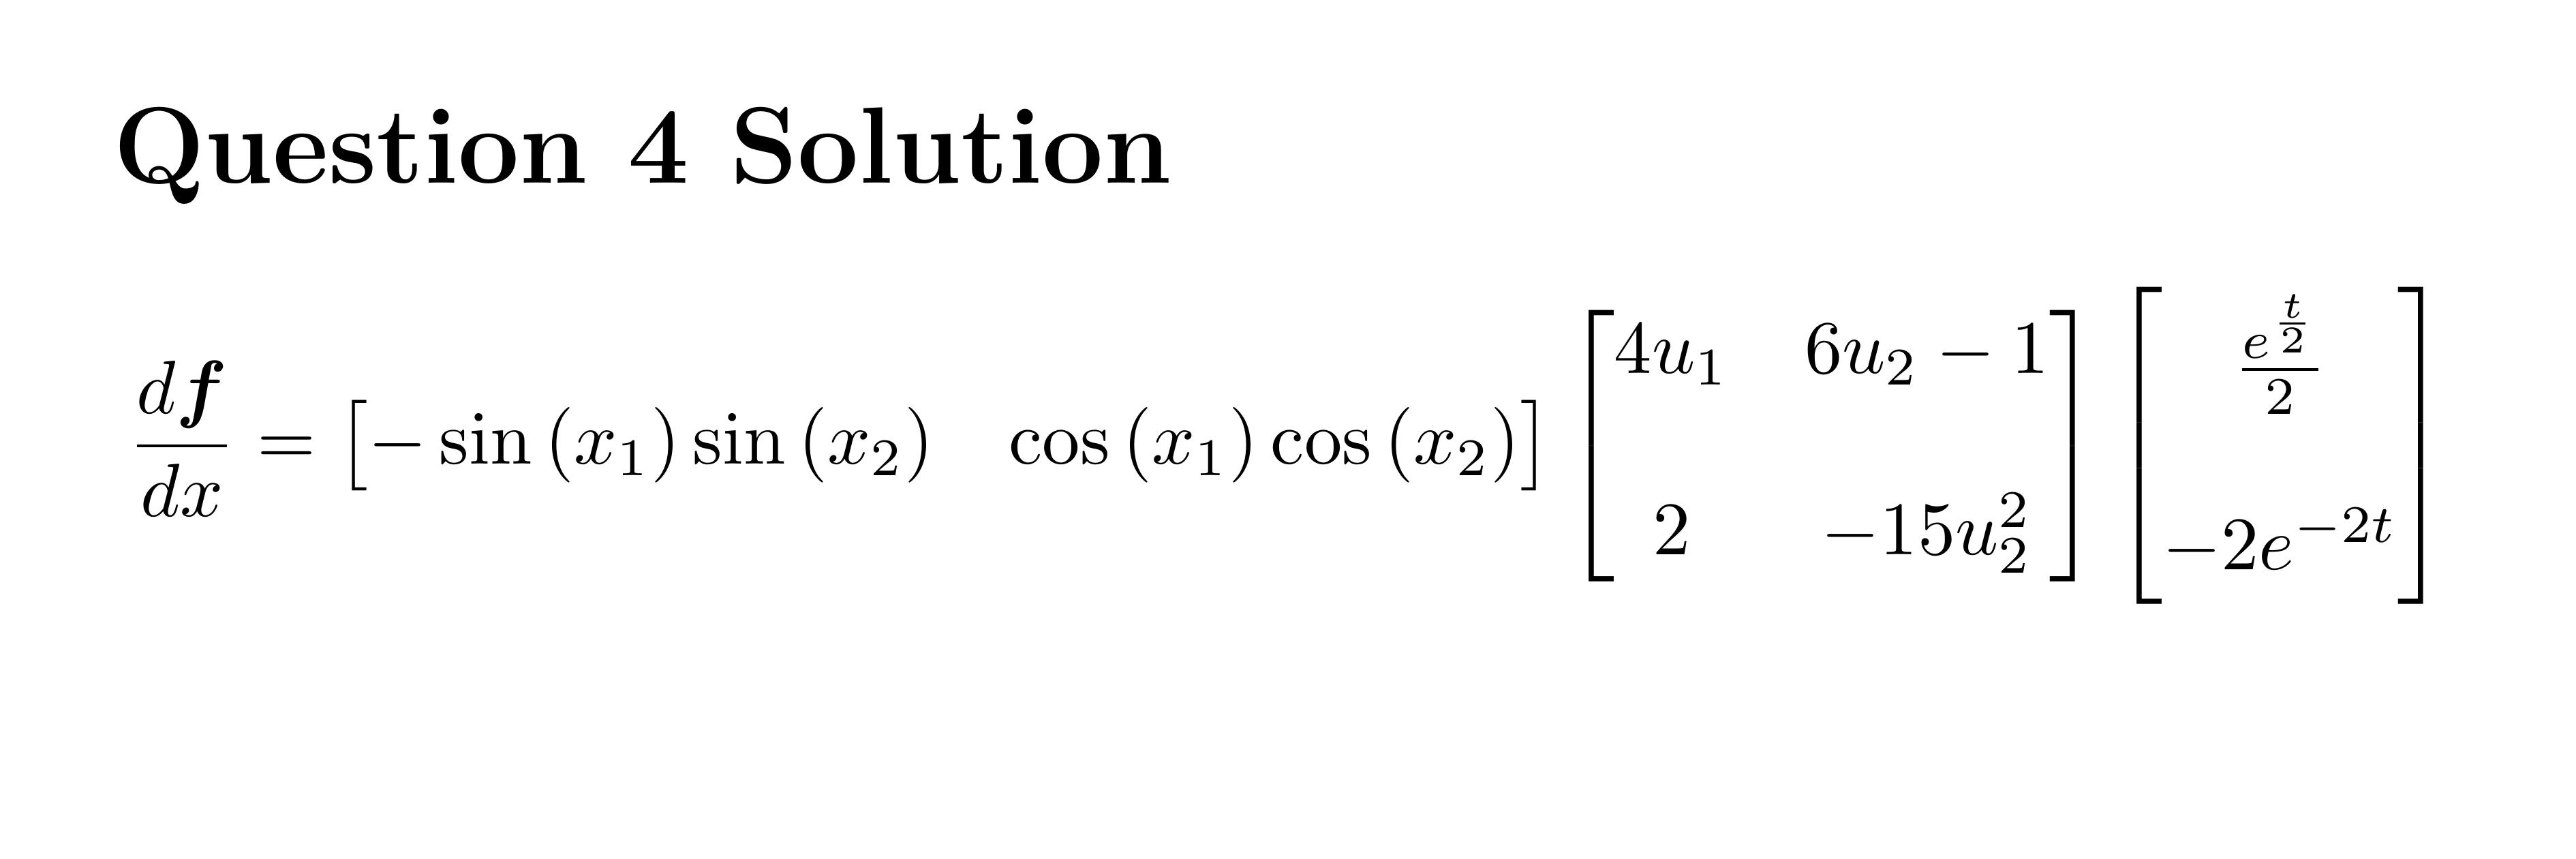

In [6]:
t = Symbol('t')
x1s= Symbol('x1')
x2s= Symbol('x2')
u1s= Symbol('u1')
u2s= Symbol('u2')
u1 = exp(t/2)
u2 = exp(-2*t)
x1 = 2*u1s**2 + 3*u2s**2 -u2s
x2 = 2*u1s - 5*u2s**3
f = sin(x2s)*cos(x1s)

fPrimeX = np.array([[diff(f,x1s), diff(f,x2s)]])
fPrimeU = np.array([[diff(x1,u1s), diff(x1,u2s)],
                    [diff(x2,u1s), diff(x2,u2s)]])
xPrimeT =np.array([[diff(u1, t), diff(u2,t)]]).T
ltxList = [convertMatrixToLatex (fPrimeX),
           convertMatrixToLatex (fPrimeU), 
            convertMatrixToLatex (xPrimeT)]
tex = encapsulateExpression(ltxList, name='\\frac{d\\boldsymbol{f}}{dx}')
writeLatex(tex, filename,
           title="Question 4 Solution",
           width="12cm",
           height="4cm")
!lualatex  "$filename" 2>>/dev/null >>/dev/null
pdf = filename.split('.')[0]+".pdf"
jpg = filename.split('.')[0]+".jpg"
pages = convert_from_path(pdf, dpi=800)
pages[0].save(jpg, "JPEG")
!rm -f "$filename" 2>>/dev/null
!rm -f "$pdf" 2>>/dev/null
im = Image(jpg,width=1000)
!rm -f "$jpg" 2>>/dev/null
display(im)

## Question 5
For the following functions, calculate the expression
$\frac{\partial f}{\partial t} = \frac{\partial f}{\partial \boldsymbol{x}}\frac{\partial \boldsymbol{x}}{\partial \boldsymbol{u}} \frac{d\boldsymbol{u}}{dt}$ in matrix form, where $\boldsymbol{x}=(x_1,x_2,x_3)$ and $\boldsymbol{u}=(u_1, u_2)$

\begin{equation*}
f(\boldsymbol{x})=f(x_1,x_2)=sin(x_1) cos(x_2) e^{x_3}
\end{equation*}

\begin{equation*}
x_1(u_1, u_2)= sin(u_1) + cos(u_2)
\end{equation*}

\begin{equation*}
x_2(u_1, u_2)= cos(u_1) - sin(u_2)
\end{equation*}

\begin{equation*}
x_3(u_1, u_2)= e^{u_1+u_2}
\end{equation*}

\begin{equation*}
u_1(t) = 1 + t/2
\end{equation*}

\begin{equation*}
u_2(t) = 1 - t/2
\end{equation*}

For the function $f(x(\boldsymbol{u}(t)))$, we can calculate the derivative of $f$ i.e. $\frac {df}{dt}$ using the formula

\begin{equation*}
\frac{df}{dt} = \frac {\partial f}{\partial \boldsymbol{x}} \frac{\partial \boldsymbol{x}}{\partial \boldsymbol{u}}\frac{\boldsymbol{u}}{dt} = 
\begin{bmatrix}
\frac{\partial f}{\partial x_1}, &
\frac{\partial f}{\partial x_2}, &
\frac{\partial f}{\partial x_3}
\end{bmatrix}
\begin{bmatrix}
\frac{\partial x_1}{\partial u_1} &
\frac{\partial x_1}{\partial u_2} \\\\
\frac{\partial x_2}{\partial u_1} &
\frac{\partial x_2}{\partial u_2} \\\\
\frac{\partial x_3}{\partial u_1} &
\frac{\partial x_3}{\partial u_2} \\\\
\end{bmatrix}
\begin{bmatrix}
\frac{du_1}{dt} \\\\
\frac{du_2}{dt}
\end{bmatrix}
\end{equation*}


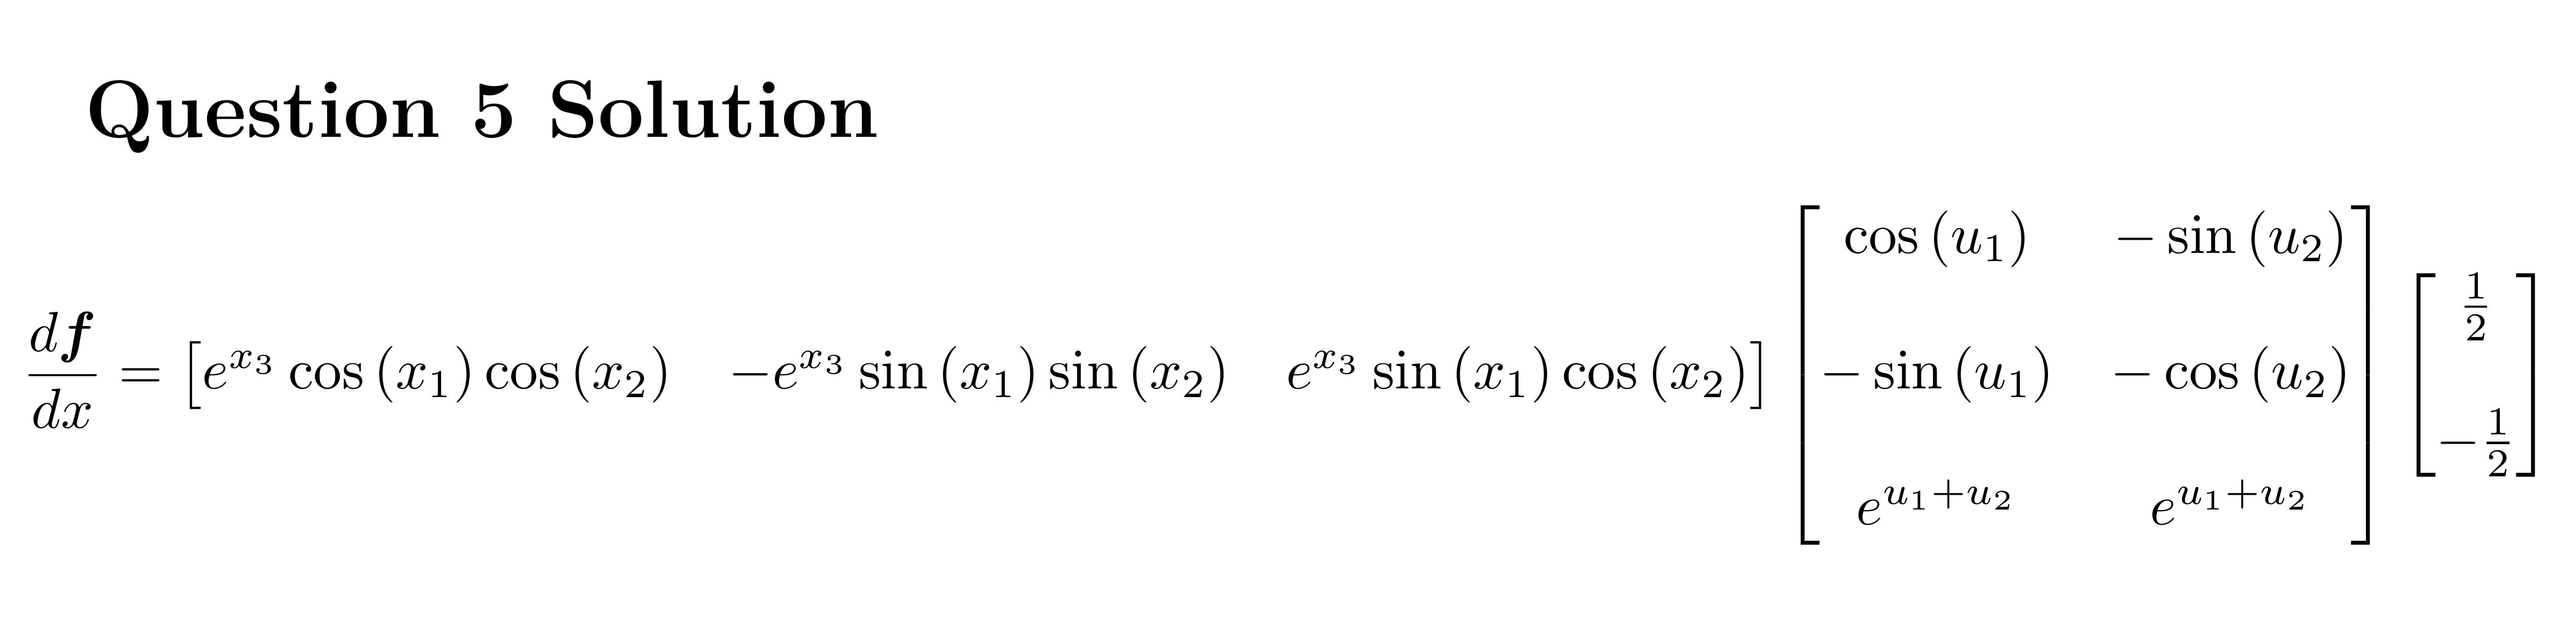

In [7]:
t = Symbol('t')
x1s= Symbol('x1')
x2s= Symbol('x2')
x3s= Symbol('x3')
u1s= Symbol('u1')
u2s= Symbol('u2')
u1 = 1 + t/2
u2 = 1 - t/2
x1 = sin(u1s) + cos(u2s)
x2 = cos(u1s) - sin(u2s)
x3 = exp(u1s+u2s)
f = sin(x1s)*cos(x2s)*exp(x3s)

fPrimeX = np.array([[diff(f,x1s), diff(f,x2s), diff(f,x3s)]])
fPrimeU = np.array([[diff(x1,u1s), diff(x1,u2s)],
                    [diff(x2,u1s), diff(x2,u2s)],
                    [diff(x3,u1s), diff(x3,u2s)]])
xPrimeT =np.array([[diff(u1, t), diff(u2,t)]]).T
ltxList = [convertMatrixToLatex (fPrimeX),
           convertMatrixToLatex (fPrimeU), 
            convertMatrixToLatex (xPrimeT)]
tex = encapsulateExpression(ltxList, name='\\frac{d\\boldsymbol{f}}{dx}')
writeLatex(tex, filename,
           title="Question 5 Solution",
           width="16cm",
           height="4cm")
!lualatex  "$filename" 2>>/dev/null >>/dev/null

pdf = filename.split('.')[0]+".pdf"
jpg = filename.split('.')[0]+".jpg"
pages = convert_from_path(pdf, dpi=800)
pages[0].save(jpg, "JPEG")
!rm -f "$filename" 2>>/dev/null
!rm -f "$pdf" 2>>/dev/null
im = Image(jpg,width=1000)
!rm -f "$filename" 2>>/dev/null
display(im)